# SIT742: Modern Data Science 
**(Assessment Task 02: Bank Marketing Data Analytics)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

**Project Group Information:**
-Group Number-126


- Names:Sai Tharun Palagiri
- Student IDs:217636438
- Emails:spalagiri@deakin.edu.au

- Names:FAROOQ SARFRAZ
- Student IDs:218436204
- Emails:Fsarfraz@deakin.edu.au

- Names:SAI PRASANTH THIRUMANI
- Student IDs:218008216
- Emails:sthirumani@deakin.edu.au


---

# 1.Import Spark

In [1]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession 
from pyspark.sql import SQLContext
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

# 2.Read and check data

In [0]:
import wget
#this is to link the bank file with the required data
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/bank.csv'
DataSet = wget.download(link_to_data)

In [4]:
!ls

bank.csv  sample_data  spark-2.4.0-bin-hadoop2.7  spark-2.4.0-bin-hadoop2.7.tgz


In [5]:
# Import the 'bank.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('bank.csv', header = True, inferSchema = True) 

#this is to show the schema of the spark dataframe
df.printSchema() 

#to show the first five rows of the dataframe
df.show(5)

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+--

In [6]:

# Data distribution using printSchema() 
df.printSchema()
print("The number of observations present in bank data set are {}".format(df.count()))


root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

The number of observations present in bank data set are 11162


In [7]:
# Summary statistics of all atrributes present in the data
df.describe().show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|summary|               age|    job| marital|education|default|           balance|housing| loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|deposit|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|  count|             11162|  11162|   11162|    11162|  11162|             11162|  11162|11162|   11162|             11162|11162|             11162|             11162|             11162|             11162|   11162|  11162|
|   mean|41.231947679627304|   null|    null|     null|   null|1528.5385235620856|   null| null|    null

In [8]:
# Unique entries present in poutcome
df.select("poutcome").distinct().rdd.map(lambda r: r[0]).collect()

['success', 'unknown', 'other', 'failure']

In [9]:
# Check for missing values
for col in df.columns:

  print(col, "\t", "with null values: ", df.filter(df[col].isNull()).count())

age 	 with null values:  0
job 	 with null values:  0
marital 	 with null values:  0
education 	 with null values:  0
default 	 with null values:  0
balance 	 with null values:  0
housing 	 with null values:  0
loan 	 with null values:  0
contact 	 with null values:  0
day 	 with null values:  0
month 	 with null values:  0
duration 	 with null values:  0
campaign 	 with null values:  0
pdays 	 with null values:  0
previous 	 with null values:  0
poutcome 	 with null values:  0
deposit 	 with null values:  0


In [10]:
# check for any entries with"?"
for col in df.columns:

  print(col, "\t", "with ‘?’ values:" , df.filter(df[col]=="?").count())

age 	 with ‘?’ values: 0
job 	 with ‘?’ values: 0
marital 	 with ‘?’ values: 0
education 	 with ‘?’ values: 0
default 	 with ‘?’ values: 0
balance 	 with ‘?’ values: 0
housing 	 with ‘?’ values: 0
loan 	 with ‘?’ values: 0
contact 	 with ‘?’ values: 0
day 	 with ‘?’ values: 0
month 	 with ‘?’ values: 0
duration 	 with ‘?’ values: 0
campaign 	 with ‘?’ values: 0
pdays 	 with ‘?’ values: 0
previous 	 with ‘?’ values: 0
poutcome 	 with ‘?’ values: 0
deposit 	 with ‘?’ values: 0


# 3.Select features

In [0]:
#Selecting features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2

#selecting the required variables as a new dataframe 
df2=df.select('age','job','marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')


In [12]:
#Remove invalid rows/records using spark.sql 

df2.registerTempTable("data")
#removing the rows with any NULL values and filtering the poutcome variable which has UNKNOWN values 
noNullValues = sqlContext.sql("SELECT age, job, marital, education, default, balance, housing, loan, campaign, pdays, previous, poutcome, deposit FROM data WHERE poutcome!='unknown' AND poutcome!='other' ")

noNullValues.show()

#creating a temporary dataframe to run the further algorithms
dftemp = noNullValues



+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 33|    services| married|secondary|     no|   3444|    yes|  no|       1|   91|       4| failure|    yes|
| 56|  technician| married|secondary|     no|    589|    yes|  no|       1|  147|       2| success|    yes|
| 34|      admin.| married| tertiary|     no|    899|    yes|  no|       1|  170|       3| failure|    yes|
| 53|     retired| married| tertiary|     no|   2269|     no|  no|       2|  150|       1| success|    yes|
| 37|  technician| married|secondary|     no|   5115|    yes|  no|       2|  171|       4| failure|    yes|
| 45|entrepreneur| married|secondary|     no|    781|     no| yes|       2|  126|       2| failure|    yes|
| 46|  unemployed|divorced|s

In [13]:
print("The values of yes in deposit are {0}".format(dftemp.filter(dftemp.deposit=="yes").count()))
print("The values of no in deposit are {0}".format(dftemp.filter(dftemp.deposit=="no").count()))

The values of yes in deposit are 1596
The values of no in deposit are 703


In [14]:
print("The Nuumber of records after filteing poutcome {0}".format(dftemp.count()))

The Nuumber of records after filteing poutcome 2299


In [15]:
#the syntex are learnt using some help from spark.apache.org and towardsdatascience.com

#Covert categorical features to metric features using One hot encoding
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator , OneHotEncoderModel , VectorAssembler

#this code is to convert the categorical values to numberical indicies 
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in list(set(dftemp.columns)-set(['age','balance','campaign','pdays','previous'])) ]

#this code is to encode the converted variable using one hot enocoding to vector forms
encoder = OneHotEncoderEstimator(
    inputCols=[indexer.getOutputCol() for indexer in indexers],
    outputCols=[
        "{0}_Vec".format(indexer.getOutputCol()) for indexer in indexers]
)

#we have this code of pipeline to run the stages of indexing and encoding on the data
pipeline = Pipeline(stages=indexers + [encoder])
dfNeww=pipeline.fit(dftemp).transform(dftemp)

#defing the variables which are to be combined to form features
cols = ['age',
 'job_index',
 'marital_index',
 'education_index',
 'default_index',
 'balance',
 'housing_index',
 'loan_index',
 'campaign',
 'pdays',
 'previous',
 'poutcome_index',
 'deposit_index']

#the vector assembler here to combine all of the required variables in the form opf a vector under one column of feature
assembler = VectorAssembler(inputCols=cols, outputCol='feature')
dfNew = assembler.transform(dfNeww)

dfNew.show()

+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+---------------+----------+---------+-------------+-------------+--------------+-------------+-------------+--------------+------------------+--------------+-----------------+-----------------+-----------------+-----------------+-------------------+--------------------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|education_index|loan_index|job_index|housing_index|default_index|poutcome_index|marital_index|deposit_index|loan_index_Vec|poutcome_index_Vec| job_index_Vec|default_index_Vec|housing_index_Vec|marital_index_Vec|deposit_index_Vec|education_index_Vec|             feature|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+---------------+----------+---------+-------------+-------------+--------------+-------------+-------------+--------------+--------------

## 3.1 normalisation

In [16]:
#Apply Min-Max normalisation on each attribute using MinMaxScaler  
from pyspark.ml.feature import MinMaxScaler 

#we use the MinMax scaler library to convert the features column formed in scaled form into a new column of features
scaler1 = MinMaxScaler(inputCol="feature", outputCol="features")
scalerModel1 = scaler1.fit(dfNew)
scaledData1 = scalerModel1.transform(dfNew)
scaledData1.show(5)







+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+---------------+----------+---------+-------------+-------------+--------------+-------------+-------------+--------------+------------------+--------------+-----------------+-----------------+-----------------+-----------------+-------------------+--------------------+--------------------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|education_index|loan_index|job_index|housing_index|default_index|poutcome_index|marital_index|deposit_index|loan_index_Vec|poutcome_index_Vec| job_index_Vec|default_index_Vec|housing_index_Vec|marital_index_Vec|deposit_index_Vec|education_index_Vec|             feature|            features|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+---------------+----------+---------+-------------+-------------+--------------+-------------+----------

# 4.Unsupervised learning

## 4.1 K-means

In [17]:
#the syntex are learnt using some help from spark.apache.org and towardsdatascience.com
# Perform unsupervised learning on df2 with k-means 
# You can use whole df2 as both training and testing data, 
# Evaluate the clustering result using Accuracy.  
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 

#We use the kMeans for clustering of the scaled Data with setting nummber of clusters to 13 and perform the model on the scaledData
kmeans = KMeans(k=7, seed=1)  # 7 clusters here optimal number of clusters from elbow analysis done below
model = kmeans.fit(scaledData1.select('features'))

#this transforms the data and adds a new column of prediction in the dataframe
ClusteredData = model.transform(scaledData1)
ClusteredData.show()    

#we use the  Clustering evaluator to evaluate the clusters formed using the Kmeans to check the accuracy of our clustering 
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(ClusteredData)
print("Silhouette with squared euclidean distance = " + str(silhouette))

centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
  print(center)



+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+---------------+----------+---------+-------------+-------------+--------------+-------------+-------------+--------------+------------------+--------------+-----------------+-----------------+-----------------+-----------------+-------------------+--------------------+--------------------+----------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|education_index|loan_index|job_index|housing_index|default_index|poutcome_index|marital_index|deposit_index|loan_index_Vec|poutcome_index_Vec| job_index_Vec|default_index_Vec|housing_index_Vec|marital_index_Vec|deposit_index_Vec|education_index_Vec|             feature|            features|prediction|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+---------------+----------+---------+-------------+-------------+--------

In [0]:
import numpy as np
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans()\
            .setK(k)\
            .setSeed(1) \
            .setFeaturesCol("features")\
            .setPredictionCol("cluster")

    model = kmeans.fit(scaledData1)
    cost[k] = model.computeCost(scaledData1)

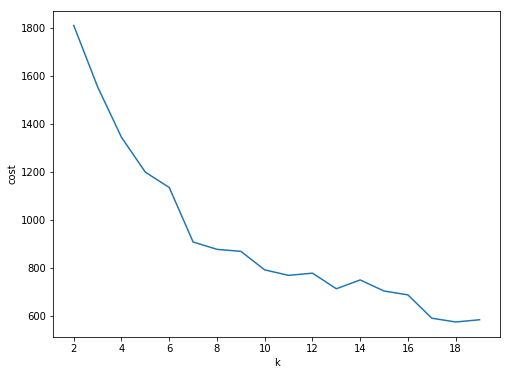

In [19]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

## 4.2 PCA

The varance explained by pc1 and pc2 are [37.7313 15.6113]


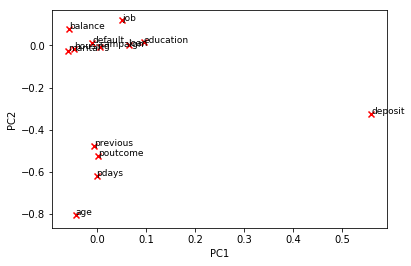

In [20]:
#the syntex are learnt using some help from spark.apache.org and towardsdatascience.com
#Generate a scatter plot using the first two PCA components to investigate the data distribution.
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

#we initilaize the pca setting k equal to 2 which are the components to reduced to
#input column as features and output as pca
pca = PCA(k=2, inputCol="features", outputCol="pca")
model = pca.fit(scaledData1)

#use transform function to transfrom the scaledData
transformed1 = model.transform(scaledData1)
data=transformed1.select('pca')

#to get the explained variances of the two reduced principle components 
variance=np.round(100.00*model.explainedVariance.toArray(),4)
ex_variance = model.explainedVariance
print("The varance explained by pc1 and pc2 are {0}".format(variance))
pc=model.pc.toArray()
pc=pc.reshape(2,13)
  
#to get the first two component eigen vectors
components = pd.DataFrame(pc, columns = df2.columns, index=[1,2])
x=pc[0,:]
y=pc[1,:]

#set the types of variables with column names
types = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

#plot the principle components with there labels on the scatter plot
for i,type in enumerate(types):
    x_coords= x[i]
    y_coords = y[i]
    
    plt.scatter(x_coords, y_coords, marker='x', color='red')
    plt.text(x_coords, y_coords, type, fontsize=9)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
plt.show()



# 5.Supervised learning

In [21]:
#the syntex are learnt using some help from spark.apache.org and towardsdatascience.com
from pyspark.sql.functions import col

#set the logisticData variable as the required dataframe to performe the supervised learning
logisticData=scaledData1.select('age',
 'job_index',
 'marital_index',
 'education_index',
 'default_index',
 'balance',
 'housing_index',
 'loan_index',
 'campaign',
 'pdays',
 'previous',
 'poutcome_index',
 col("deposit_index").alias("label"),'features')

#divide the data into training and testing data with 70 and 30 percent ratio
train, test = logisticData.randomSplit([0.7, 0.3], seed = 742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1615
Test Dataset Count: 684


## 5.1 LogisticRegression

In [0]:
#the syntex are learnt using some help from spark.apache.org and towardsdatascience.com
# Logistic Regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 

#performing the logistic regression model of spark
#input column as features and the lebel column as label which the variable of interest that is deposit here
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lr_Model = lr.fit(train)






In [23]:
#Exam the coefficients
#to get the coeeficients of the variables for logistic regression
coefficients = np.sort(lr_Model.coefficients)
print(coefficients)

#to get the ROC value of the regression
summary=lr_Model.summary
ROC=summary.areaUnderROC
print(ROC)

#prediction on test data
predictions_logistic = lr_Model.transform(test)
predictions_logistic.select('age', 'job_index','marital_index', 'education_index', 'default_index', 'balance', 'housing_index', 'loan_index', 'campaign', 'pdays', 'previous', 'poutcome_index', 'label', 'prediction', 'probability').show(10)

#the evaluation part for the accuracy
Evaluate = BinaryClassificationEvaluator()

print('Test Area Under ROC', Evaluate.evaluate(predictions_logistic))

[-6.49621029 -5.83491529 -4.7030214  -4.13887764 -1.91093382 -1.38065349
 -1.28927482 -1.21337854 -0.83258525 -0.74008648  0.20288795  1.02935382
 16.65021614]
0.999956512600474
+---+---------+-------------+---------------+-------------+-------+-------------+----------+--------+-----+--------+--------------+-----+----------+--------------------+
|age|job_index|marital_index|education_index|default_index|balance|housing_index|loan_index|campaign|pdays|previous|poutcome_index|label|prediction|         probability|
+---+---------+-------------+---------------+-------------+-------+-------------+----------+--------+-----+--------+--------------+-----+----------+--------------------+
| 18|      7.0|          1.0|            2.0|          0.0|    608|          0.0|       0.0|       1|   93|       1|           2.0|  1.0|       1.0|[2.01045795574142...|
| 19|      7.0|          1.0|            2.0|          0.0|    608|          0.0|       0.0|       1|  180|       2|           2.0|  1.0|     

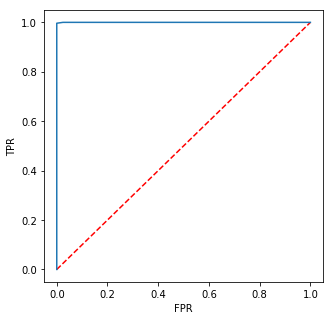

In [24]:
lr_Model.summary.roc.select('FPR').collect()
lr_Model.summary.roc.select('TPR').collect()
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lr_Model.summary.roc.select('FPR').collect(),
         lr_Model.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## 5.2 Decision tree

In [25]:
#the syntex are learnt using some help from spark.apache.org and towardsdatascience.com
#Decision tree
from pyspark.ml.classification import DecisionTreeClassifier 

#running the decision tree model from spark on the datafram 
#input column as the features and label column as the label and the maximun depth is set to 5
decisionTree = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 5)
dt_Model = decisionTree.fit(train)

#transforming the dataframe and making predictions
predictions_decision_tree = dt_Model.transform(test)
predictions_decision_tree.select('age', 'job_index','marital_index', 'education_index', 'default_index', 'balance', 'housing_index', 'loan_index', 'campaign', 'pdays', 'previous', 'poutcome_index', 'label', 'prediction', 'probability').show(10)

#evaluating the model using the accuracy 
print("Test Accuracy {0}".format(Evaluate.evaluate(predictions_decision_tree)))

+---+---------+-------------+---------------+-------------+-------+-------------+----------+--------+-----+--------+--------------+-----+----------+-----------+
|age|job_index|marital_index|education_index|default_index|balance|housing_index|loan_index|campaign|pdays|previous|poutcome_index|label|prediction|probability|
+---+---------+-------------+---------------+-------------+-------+-------------+----------+--------+-----+--------+--------------+-----+----------+-----------+
| 18|      7.0|          1.0|            2.0|          0.0|    608|          0.0|       0.0|       1|   93|       1|           2.0|  1.0|       1.0|  [0.0,1.0]|
| 19|      7.0|          1.0|            2.0|          0.0|    608|          0.0|       0.0|       1|  180|       2|           2.0|  1.0|       1.0|  [0.0,1.0]|
| 20|      7.0|          1.0|            0.0|          0.0|    215|          0.0|       0.0|       1|   92|       6|           2.0|  1.0|       1.0|  [0.0,1.0]|
| 21|      7.0|          1.0|     

## 5.3 NaiveBayes

In [26]:
#the syntex are learnt using some help from spark.apache.org and towardsdatascience.com
#NaiveBayes
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#performing the naiveBayes supervised learning to train the model with smoothing set to 1
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")
model = nb.fit(train)

#traing the data and making the predictions
predictions = model.transform(test)
predictions.select('age', 'job_index','marital_index', 'education_index', 'default_index', 'balance', 'housing_index', 'loan_index', 'campaign', 'pdays', 'previous', 'poutcome_index','label','prediction','probability').show()

#evalutauing the data using multiClassificationEvaluator to find the accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

#orinting the accuracy of the model
print("Test set accuracy = " + str(accuracy))


+---+---------+-------------+---------------+-------------+-------+-------------+----------+--------+-----+--------+--------------+-----+----------+--------------------+
|age|job_index|marital_index|education_index|default_index|balance|housing_index|loan_index|campaign|pdays|previous|poutcome_index|label|prediction|         probability|
+---+---------+-------------+---------------+-------------+-------+-------------+----------+--------+-----+--------+--------------+-----+----------+--------------------+
| 18|      7.0|          1.0|            2.0|          0.0|    608|          0.0|       0.0|       1|   93|       1|           2.0|  1.0|       1.0|[6.32098092127616...|
| 19|      7.0|          1.0|            2.0|          0.0|    608|          0.0|       0.0|       1|  180|       2|           2.0|  1.0|       1.0|[6.75646123337687...|
| 20|      7.0|          1.0|            0.0|          0.0|    215|          0.0|       0.0|       1|   92|       6|           2.0|  1.0|       1.0|[5